## System of equations - 1
$$ f_i=\frac{x_i}{\sin x_i} $$

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pandas as pd
plt.rcParams['figure.figsize']=(7,7)
plt.rcParams.update({'font.size': 13})
# %config InlineBackend.close_figures=False # keep figures open in pyplot

## Plotting the function
$$ P(x)=\frac{x}{\sin x} $$

In [2]:
def sinx_x(limit=[-20, 20, -20, 20], size=10):
    def load(x): return x/math.sin(x)

    f = np.vectorize(load)
    a = size
    for i in np.arange(-a, a+1):
        x = np.linspace(i*math.pi+0.00000001, i *
                        math.pi+math.pi-0.00000001, 100)
        y = f(x)
        plt.plot(x, y, 'tab:blue', linewidth=2)
    plt.xlim(limit[0], limit[1])
    plt.ylim(limit[2], limit[3])
    plt.title('f=x/sin(x) Plot')
    plt.xlabel('x')
    plt.ylabel('f')
    plt.axvline(c="black",lw=1,ls='--')
    plt.axhline(c="black",lw=1,ls='--')
    ax = plt.gca()
    ax.set_aspect('equal')

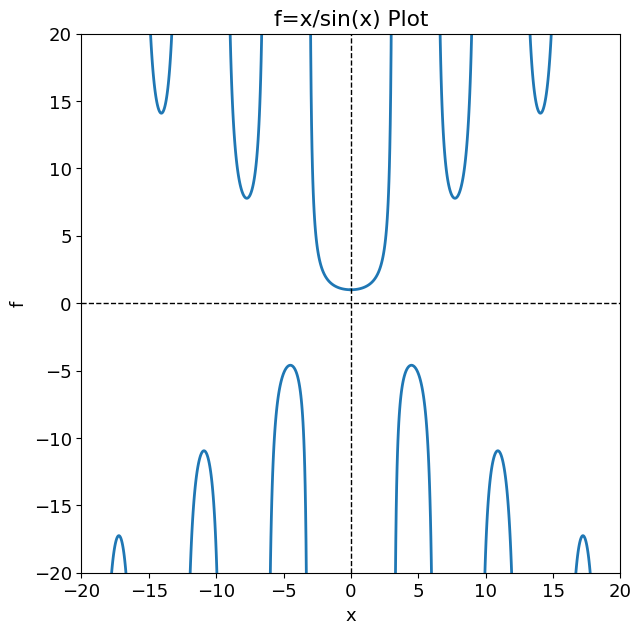

In [3]:
sinx_x()

$$ F(x)=\frac{x}{\sin x} - f = 0$$
$$ F_1 =\frac{x_1}{\sin x_1} - f_1 = 0 ,\quad F_2 =\frac{x_2}{\sin x_2} - f_2 = 0 $$
$$
    \begin{bmatrix}
        \frac{\partial F_1(x_1,x_2)}{\partial x_1} & \frac{\partial F_1(x_1,x_2)}{\partial x_2} \\
        \frac{\partial F_2(x_1,x_2)}{\partial x_1} & \frac{\partial F_2(x_1,x_2)}{\partial x_2}
    \end{bmatrix}
    \begin{bmatrix}
        u_1 \\ u_2
    \end{bmatrix}
    =
    \begin{bmatrix}
        -F_1(x_1,x_2) \\
        -F_2(x_1,x_2) 
    \end{bmatrix}
$$

In [4]:
def Fdiff(x): return (math.sin(x)-x*math.cos(x))/(math.sin(x))**2

def F(x,f): return (x/math.sin(x))-f

def solve(x_initial=2.5, f=np.array([[1.2], [0.5]])):
    tolerance = 0.000001
    x_sol = np.array([[x_initial], [x_initial]])
    while True:
        A = np.array([[Fdiff(x_sol[0,-1]), 0],[0, Fdiff(x_sol[1,-1])]])
        b = np.array([-F(x_sol[0,-1],f[0,-1]),-F(x_sol[1,-1],f[1,-1])])
        u = np.linalg.solve(A,b)
        x_sol = np.c_[x_sol, x_sol[:,-1]+u]
        if np.linalg.norm(u)<tolerance:
            print("Number of iterations = %d" % (x_sol.size/2))
            break
        elif x_sol.size/2 >= 200:
            print("Number of iterations = %d" % (x_sol.size/2))
            # print(u)
            break
    return x_sol[:,-1]

In [5]:
solve(x_initial=2.5, f=np.array([[1.2], [0.5]]))

Number of iterations = 200


array([ 1.02673829, 14.33943195])

In [6]:
solve(x_initial=2.1, f=np.array([[1], [5]]))

Number of iterations = 24


array([5.40650753e-07, 2.59573908e+00])

In [7]:
solve(x_initial=2.5, f=np.array([[1.2], [1.5]]))

Number of iterations = 8


array([1.02673829, 1.49578157])